The task description:<br>
The time series containing inflation data in China (cpiycn_m_m.csv).<br>
a. Separate the last year of data and do not use it in further steps. It will serve you
to check the quality of your model. When checking the quality, we must keep the true values.<br>
b. Use any method to remove outlier observations.<br>
c. Prepare any model that predicts future values. Teach the model in 2 versions - once using the original data and once using the data with the removed outlier observations.<br>
d. Prepare a prediction for both models for one year. It will overlap the prediction period with
separated data. Compare the prediction with the true data using the MAE. <br>
e. Which model is better?

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [65]:
df = pd.read_csv('./cpiycn_m_m.csv')

In [66]:
df

,Date,Open,High,Low,Close
0,2010-05-31,3.1,3.1,3.1,3.1
1,2010-06-30,2.9,2.9,2.9,2.9
2,2010-07-31,3.3,3.3,3.3,3.3
3,2010-09-30,3.6,3.6,3.6,3.6
4,2010-10-31,4.4,4.4,4.4,4.4
...,...,...,...,...,...
142,2022-06-30,2.5,2.5,2.5,2.5
143,2022-07-31,2.7,2.7,2.7,2.7
144,2022-08-31,2.5,2.5,2.5,2.5
145,2022-09-30,2.8,2.8,2.8,2.8


In [67]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  

In [68]:
df2 = df.copy()

In [69]:
#Separate the last year of data. I will not use it in further steps.
df2 = df2[(df2.index < pd.to_datetime('2021-11-01'))]

In [70]:
df2 = df2.reset_index()

In [71]:
#drop the rest of the columns
df2.drop(['Open', 'High', 'Low'],axis=1, inplace=True)
df2.columns=['ds', 'y']
df2.head()

,ds,y
0,2010-05-31,3.1
1,2010-06-30,2.9
2,2010-07-31,3.3
3,2010-09-30,3.6
4,2010-10-31,4.4


In [72]:
#I will use Prophet model to predict data
model = Prophet(interval_width = 0.90)
model.fit(df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.31777


/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       163.569   4.64259e-05       58.3804        1.12      0.2909      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       163.577   7.47508e-09        64.709      0.3488      0.3488      224   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [73]:
# creating future dates
future = model.make_future_dataframe(periods=12, freq="M")
future

,ds
0,2010-05-31
1,2010-06-30
2,2010-07-31
3,2010-09-30
4,2010-10-31
...,...
142,2022-06-30
143,2022-07-31
144,2022-08-31
145,2022-09-30


In [74]:
#prediction
forecast_prediction = model.predict(future)
forecast_prediction.tail()

/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
142,2022-06-30,1.178483,-0.828378,2.943889,1.177802,1.179206,0.004768,0.004768,0.004768,0.004768,0.004768,0.004768,0.0,0.0,0.0,1.183250
143,2022-07-31,1.161993,-0.565146,3.059362,1.161170,1.162844,0.041636,0.041636,0.041636,0.041636,0.041636,0.041636,0.0,0.0,0.0,1.203629
144,2022-08-31,1.145504,-1.032030,2.862505,1.144511,1.146515,-0.228130,-0.228130,-0.228130,-0.228130,-0.228130,-0.228130,0.0,0.0,0.0,0.917374
145,2022-09-30,1.129546,-0.741038,3.133671,1.128419,1.130712,0.032302,0.032302,0.032302,0.032302,0.032302,0.032302,0.0,0.0,0.0,1.161849
146,2022-10-31,1.113057,-0.570585,3.004465,1.111803,1.114378,0.081921,0.081921,0.081921,0.081921,0.081921,0.081921,0.0,0.0,0.0,1.194978


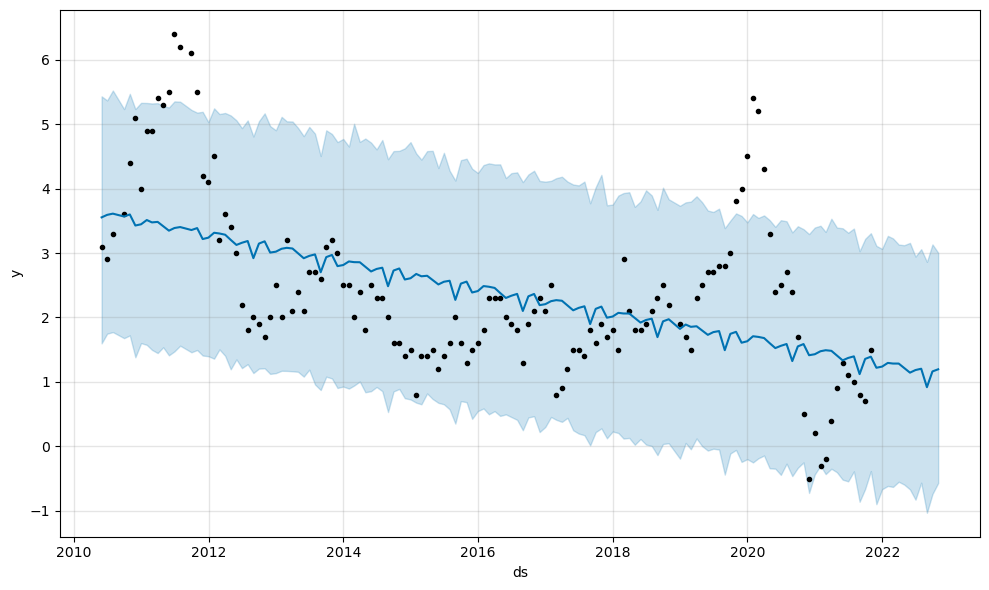

In [75]:
#plot prediction with outliers
plot1 = model.plot(forecast_prediction)

In [76]:
#look at the fist 15 rows in the prediction
forecast_prediction.head(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-05-31,3.604344,1.597065,5.431459,3.604344,3.604344,-0.051458,-0.051458,-0.051458,-0.051458,-0.051458,-0.051458,0.0,0.0,0.0,3.552885
1,2010-06-30,3.587088,1.747348,5.368245,3.587088,3.587088,0.004768,0.004768,0.004768,0.004768,0.004768,0.004768,0.0,0.0,0.0,3.591856
2,2010-07-31,3.569257,1.772567,5.521767,3.569257,3.569257,0.041636,0.041636,0.041636,0.041636,0.041636,0.041636,0.0,0.0,0.0,3.610893
3,2010-09-30,3.534170,1.678255,5.233419,3.534170,3.534170,0.032302,0.032302,0.032302,0.032302,0.032302,0.032302,0.0,0.0,0.0,3.566473
4,2010-10-31,3.516340,1.720716,5.470158,3.516340,3.516340,0.081921,0.081921,0.081921,0.081921,0.081921,0.081921,0.0,0.0,0.0,3.598261
5,2010-11-30,3.499084,1.381309,5.234200,3.499084,3.499084,-0.072523,-0.072523,-0.072523,-0.072523,-0.072523,-0.072523,0.0,0.0,0.0,3.426560
6,2010-12-31,3.481253,1.601357,5.330632,3.481253,3.481253,-0.035618,-0.035618,-0.035618,-0.035618,-0.035618,-0.035618,0.0,0.0,0.0,3.445635
7,2011-01-31,3.463422,1.574170,5.328519,3.463422,3.463422,0.048361,0.048361,0.048361,0.048361,0.048361,0.048361,0.0,0.0,0.0,3.511783
8,2011-02-28,3.447317,1.496697,5.320725,3.447317,3.447317,0.027762,0.027762,0.027762,0.027762,0.027762,0.027762,0.0,0.0,0.0,3.475079
9,2011-03-31,3.429486,1.446890,5.325627,3.429486,3.429486,0.053264,0.053264,0.053264,0.053264,0.053264,0.053264,0.0,0.0,0.0,3.482750


In [82]:
#merge df2 and forecast prediction to identify the outliers
outlier_identify = pd.merge(df2, forecast_prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [83]:
outlier_identify

,ds,y,yhat,yhat_lower,yhat_upper
0,2010-05-31,3.1,3.552885,1.597065,5.431459
1,2010-06-30,2.9,3.591856,1.747348,5.368245
2,2010-07-31,3.3,3.610893,1.772567,5.521767
3,2010-09-30,3.6,3.566473,1.678255,5.233419
4,2010-10-31,4.4,3.598261,1.720716,5.470158
...,...,...,...,...,...
130,2021-06-30,1.1,1.371304,-0.544336,3.314331
131,2021-07-31,1.0,1.395702,-0.389841,3.379175
132,2021-08-31,0.8,1.120046,-0.861244,3.027616
133,2021-09-30,0.7,1.356027,-0.663172,3.219178


In [85]:
#identify the outliers by marking them as 1 if they are upper than yhat_upper and lower than yhat_lower
outlier_identify['outliers'] = test.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)

In [86]:
#count the outliers
outlier_identify['outliers'].value_counts()

0    122
1     13
Name: outliers, dtype: int64

In [107]:
df3 = outlier_identify.copy()

In [108]:
df4

,ds,y,yhat,yhat_lower,yhat_upper,outliers
0,2010-05-31,3.1,3.552885,1.691252,5.445923,0
1,2010-06-30,2.9,3.591856,1.728162,5.518880,0
2,2010-07-31,3.3,3.610893,1.665525,5.512536,0
3,2010-09-30,3.6,3.566473,1.572136,5.434798,0
4,2010-10-31,4.4,3.598261,1.685663,5.544866,0
...,...,...,...,...,...,...
130,2021-06-30,1.1,1.371304,-0.579202,3.211544,0
131,2021-07-31,1.0,1.395702,-0.517169,3.355041,0
132,2021-08-31,0.8,1.120046,-0.895379,3.004941,0
133,2021-09-30,0.7,1.356027,-0.578259,3.302706,0


In [109]:
#replaced the outliers with the fitted values
df4['y'] = np.where(df4['outliers'] == 1, df4['yhat'], df4['y'])

In [112]:
#create a Prophet model for the data frame with replaced outliers
model3 = Prophet(interval_width = 0.90)
model3.fit(df4)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.48913


/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       197.749   8.49811e-05       68.8698      0.4792      0.4792      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       197.758    2.1565e-05       82.7774   2.722e-07       0.001      218  LS failed, Hessian reset 
     165       197.759    3.5976e-09       59.7799      0.1569      0.1569      259   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [114]:
#create future dates for the model
future3 = model3.make_future_dataframe(periods=12, freq="M")

In [115]:
forecast3 = model3.predict(future3)

/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


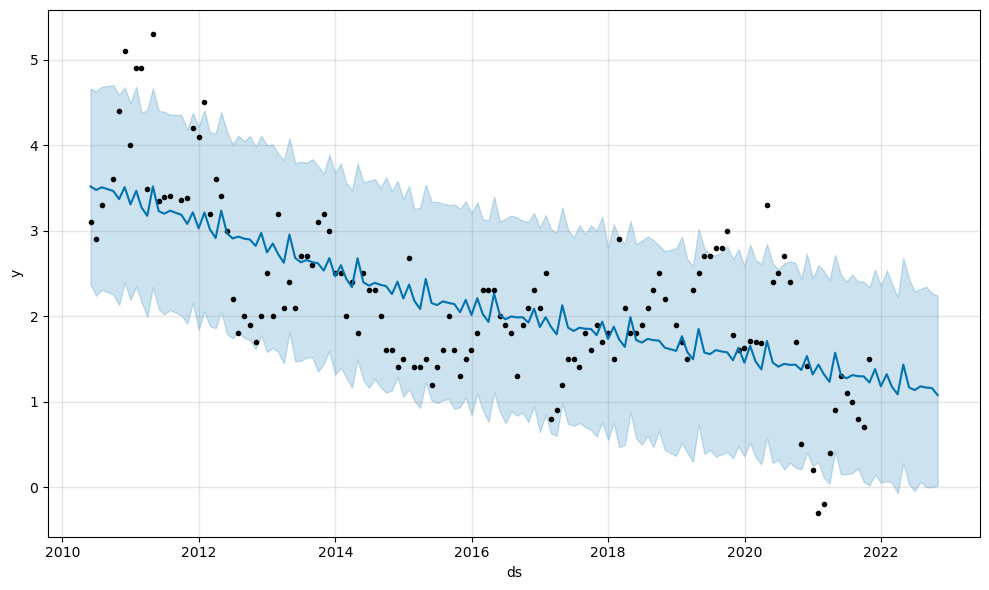

In [116]:
#plot the forecast for the model with replaced outliers
plot3 = model3.plot(forecast3)

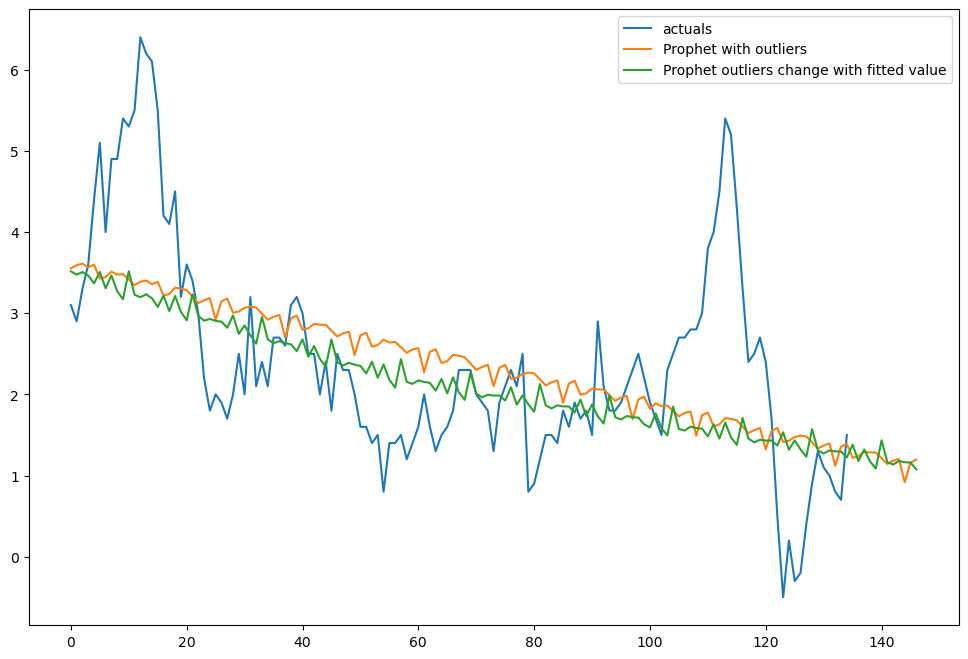

In [119]:
plt.figure(figsize=(12, 8))
plt.plot(df2['y'], label='actuals')
plt.plot(forecast_prediction['yhat'], label='Prophet with outliers')
plt.plot(forecast3['yhat'], label='Prophet outliers change with fitted value')
plt.legend()
plt.show()

In [155]:
actual_verify = df[(df.index >= pd.to_datetime('2021-11-01'))]#actual data for the last year

In [156]:
#seperate the data for the last year for the model with the outliers
prophet_with_outliers_verify= forecast_prediction[['ds', 'yhat']].copy()
prophet_with_outliers_verify.set_index('ds', inplace=True)  
prophet_with_outliers_verify= prophet_with_outliers_verify[(prophet_with_outliers_verify.index >= pd.to_datetime('2021-11-01'))&(prophet_with_outliers_verify.index < pd.to_datetime('2022-11-01'))]

In [157]:
#seperate the data for the last year for the model without the outliers
prophet_without_outliers_verify = forecast3[['ds', 'yhat']].copy()
prophet_without_outliers_verify.set_index('ds', inplace=True)
prophet_without_outliers_verify= prophet_without_outliers_verify[(prophet_without_outliers_verify.index >= pd.to_datetime('2021-11-01'))&(prophet_without_outliers_verify.index < pd.to_datetime('2022-11-01'))]

In [158]:
#count MAE for the model with the outliers
mean_prophet_outliers = mean_absolute_error(actual_verify['Close'],prophet_with_outliers_verify['yhat'])

In [159]:
#count MAE for the model without the outliers
mean_prophet_without_outliers = mean_absolute_error(actual_verify['Close'],prophet_without_outliers_verify['yhat'])

In [160]:
print(mean_prophet_outliers, mean_prophet_without_outliers)

0.9266692301610185 0.9032792533907849


In [161]:
#count MAPE for both models
mape_prophet_outliers = mean_absolute_percentage_error(actual_verify['Close'],prophet_with_outliers_verify_1['yhat'])
mape_prophet_without_outliers = mean_absolute_percentage_error(actual_verify['Close'],prophet_without_outliers_verify['yhat'])
print(mape_prophet_outliers, mape_prophet_without_outliers)

0.4384641227307237 0.42864901617545864


Both MAE and MAPE scores are better for the model without the outliers.

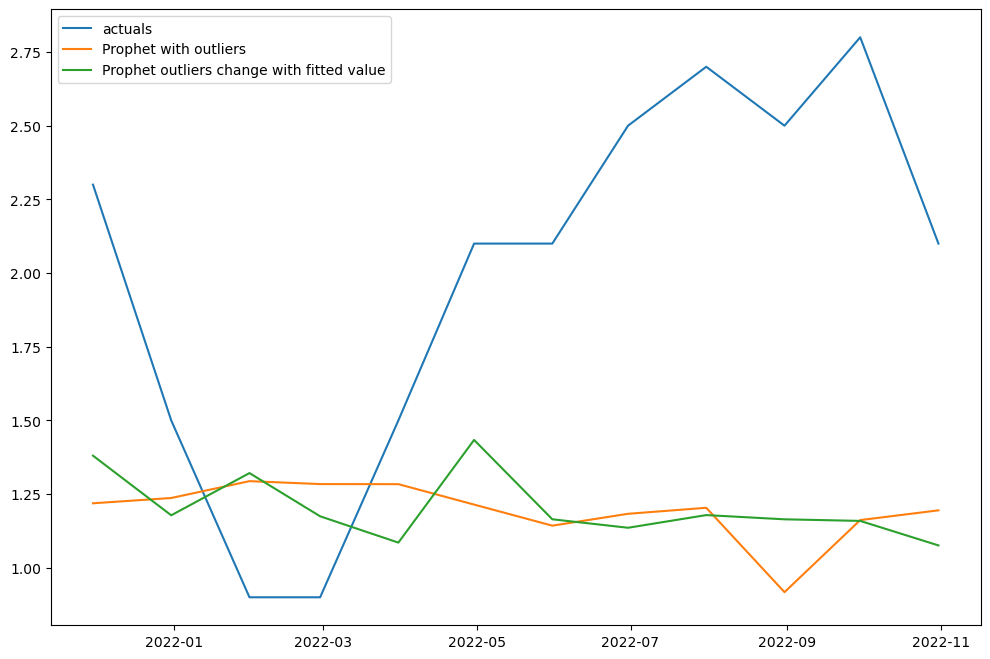

In [162]:
#plot the actual data and the prediction with and without the outliers only for the last year
plt.figure(figsize=(12, 8))
plt.plot(actual_verify['Close'], label='actuals')
plt.plot(prophet_with_outliers_verify['yhat'], label='Prophet with outliers')
plt.plot(prophet_without_outliers_verify['yhat'], label='Prophet outliers change with fitted value')
plt.legend()
plt.show()